In [5]:
# Problem statement- check the rating and if rating is good then we will increase it otherwise we will improve 
#it.The main goal of this project is to perform extensive Exploratory Data Analysis(EDA) on
#the Zomato Dataset and build an appropriate Machine Learning Model that will help
#various Zomato Restaurants to predict their respective Ratings based on certain
#features.

#Approach: The classical machine learning tasks like Data Exploration, Data Cleaning,
#Feature Engineering, Model Building and Model Testing. Try out different machine
#learning algorithms that’s best fit for the above case.

#Results: You have to build a solution that should able to predict the ratings of the
#restaurants listed in the dataset.

In [6]:
import pandas as pd # Data manipulation
import numpy as np # Mathematical calculation
import matplotlib.pyplot as plt # Visualization(graph,histogram,pie chart, bar graph)
import seaborn as sns #Seaborn is a Python data visualization library based on matplotlib.
#It provides a high-level interface for drawing attractive and informative statistical graphics.
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv("zomato.csv")#research about encoding
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
data.shape

(51717, 17)

In [9]:
data.columns.to_list()

['url',
 'address',
 'name',
 'online_order',
 'book_table',
 'rate',
 'votes',
 'phone',
 'location',
 'rest_type',
 'dish_liked',
 'cuisines',
 'approx_cost(for two people)',
 'reviews_list',
 'menu_item',
 'listed_in(type)',
 'listed_in(city)']

Data cleaning- Here we will clean our data for wrong datatypes,we will handle null values,remove irrelevant columns,outliers etc.

Let's rename the complex named columns for easy understanding

In [10]:
data.rename(columns={'approx_cost(for two people)':'approx_cost','listed_in(city)':'area'},inplace=True)

In [11]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost', 'reviews_list', 'menu_item', 'listed_in(type)', 'area'],
      dtype='object')

Let's drop the irrelevant columns

In [12]:
data.drop(['url','address','menu_item','reviews_list','dish_liked','phone','listed_in(type)'],axis=1,inplace=True)

In [13]:
df=data

In [14]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Banashankari


Let's check for datatypes

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   name          51717 non-null  object
 1   online_order  51717 non-null  object
 2   book_table    51717 non-null  object
 3   rate          43942 non-null  object
 4   votes         51717 non-null  int64 
 5   location      51696 non-null  object
 6   rest_type     51490 non-null  object
 7   cuisines      51672 non-null  object
 8   approx_cost   51371 non-null  object
 9   area          51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


Let's check for "rate" columns

In [16]:
#unique values
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

#above excution there are many null and garbage values

In [17]:
df['rate']=df['rate'].str.replace('/5','')
df['rate']=df['rate'].str.replace('nan','NaN')
df['rate']=df['rate'].str.replace('NEW','NaN')
df['rate']=df['rate'].str.replace('-','NaN')
df['rate']=df['rate'].str.replace(' /5','')
df['rate']=df['rate'].fillna(np.nan)
df['rate']=df['rate'].str.replace(' ','')

In [18]:
df['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2', '2.3',
       '4.8', '4.9', '2.1', '2.0', '1.8'], dtype=object)

Let's check for "approx_cost" column

In [19]:
#unique values
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [20]:
df['approx_cost']=df['approx_cost'].str.replace("nan","NaN")
df['approx_cost']=df['approx_cost'].fillna('NaN')
df['approx_cost']=df['approx_cost'].str.replace(",","")

In [21]:
df['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1200', '350', '250',
       '950', '1000', '1500', '1300', '199', '80', '1100', '160', '1600',
       '230', '130', '50', '190', '1700', 'NaN', '1400', '180', '1350',
       '2200', '2000', '1800', '1900', '330', '2500', '2100', '3000',
       '2800', '3400', '40', '1250', '3500', '4000', '2400', '2600',
       '120', '1450', '469', '70', '3200', '60', '560', '240', '360',
       '6000', '1050', '2300', '4100', '5000', '3700', '1650', '2700',
       '4500', '140'], dtype=object)

Now let's change the datatype object to float

In [22]:
df['approx_cost']=df['approx_cost'].astype(float)
df['rate']=df['rate'].astype(float)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          51717 non-null  object 
 1   online_order  51717 non-null  object 
 2   book_table    51717 non-null  object 
 3   rate          41665 non-null  float64
 4   votes         51717 non-null  int64  
 5   location      51696 non-null  object 
 6   rest_type     51490 non-null  object 
 7   cuisines      51672 non-null  object 
 8   approx_cost   51371 non-null  float64
 9   area          51717 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 3.9+ MB


Let's check data description

In [24]:
df.describe()

,rate,votes,approx_cost
count,41665.000000,51717.000000,51371.000000
mean,3.700449,283.697527,555.431566
std,0.440513,803.838853,438.850728
min,1.800000,0.000000,40.000000
25%,3.400000,7.000000,300.000000
50%,3.700000,41.000000,400.000000
75%,4.000000,198.000000,650.000000
max,4.900000,16832.000000,6000.000000


Let's check the null values

In [25]:
df.isnull().sum()

name                0
online_order        0
book_table          0
rate            10052
votes               0
location           21
rest_type         227
cuisines           45
approx_cost       346
area                0
dtype: int64

Let's check for the percentage of null values

In [26]:
(df.isnull().sum()/df.shape[0])*100

name             0.000000
online_order     0.000000
book_table       0.000000
rate            19.436549
votes            0.000000
location         0.040606
rest_type        0.438927
cuisines         0.087012
approx_cost      0.669026
area             0.000000
dtype: float64

From the above execution we found columns "location","rest_type","cusines","approx_cost" have less number of null values as compared to "rate" column. Let's drop the null values from them

In [27]:
df=df[df['location'].notna()]
df=df[df['rest_type'].notna()]
df=df[df['cuisines'].notna()]
df=df[df['approx_cost'].notna()]

In [28]:
df.isna().sum()

name               0
online_order       0
book_table         0
rate            9885
votes              0
location           0
rest_type          0
cuisines           0
approx_cost        0
area               0
dtype: int64

Lets handle the null values in the rate columns

In [29]:
df["rate"].describe()

count    41263.000000
mean         3.702011
std          0.439985
min          1.800000
25%          3.400000
50%          3.700000
75%          4.000000
max          4.900000
Name: rate, dtype: float64

let's check for the outliers by statistical method 

In [30]:
q1 = df['rate'].quantile(0.25)
q3 = df['rate'].quantile(0.75)

xyz = q3 - q1

lower_range=q1 -  (1.5*xyz)
upper_range = q3 + (1.5 * xyz)

outliers = len(df[(df['rate'] < lower_range) | (df['rate'] > upper_range)])
print("Number of Rows having Outliers : ", outliers)

Number of Rows having Outliers :  183


from the above execution we found that we have 183 outliers in the rate columns but we are all know that rating is always in range from 1 to 5so we will impute with median

In [31]:
df['rate']=df['rate'].fillna(df['rate'].median())
df.isna().sum()

name            0
online_order    0
book_table      0
rate            0
votes           0
location        0
rest_type       0
cuisines        0
approx_cost     0
area            0
dtype: int64

lets check the numerical collumn

In [32]:
Numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
print("there are {} numerical features and their names are {}".format(len(Numerical_features),Numerical_features))

there are 3 numerical features and their names are ['rate', 'votes', 'approx_cost']


LETS CHECK FOR THE DISTRIBUTION OF THE NUMERICAL FEATURES

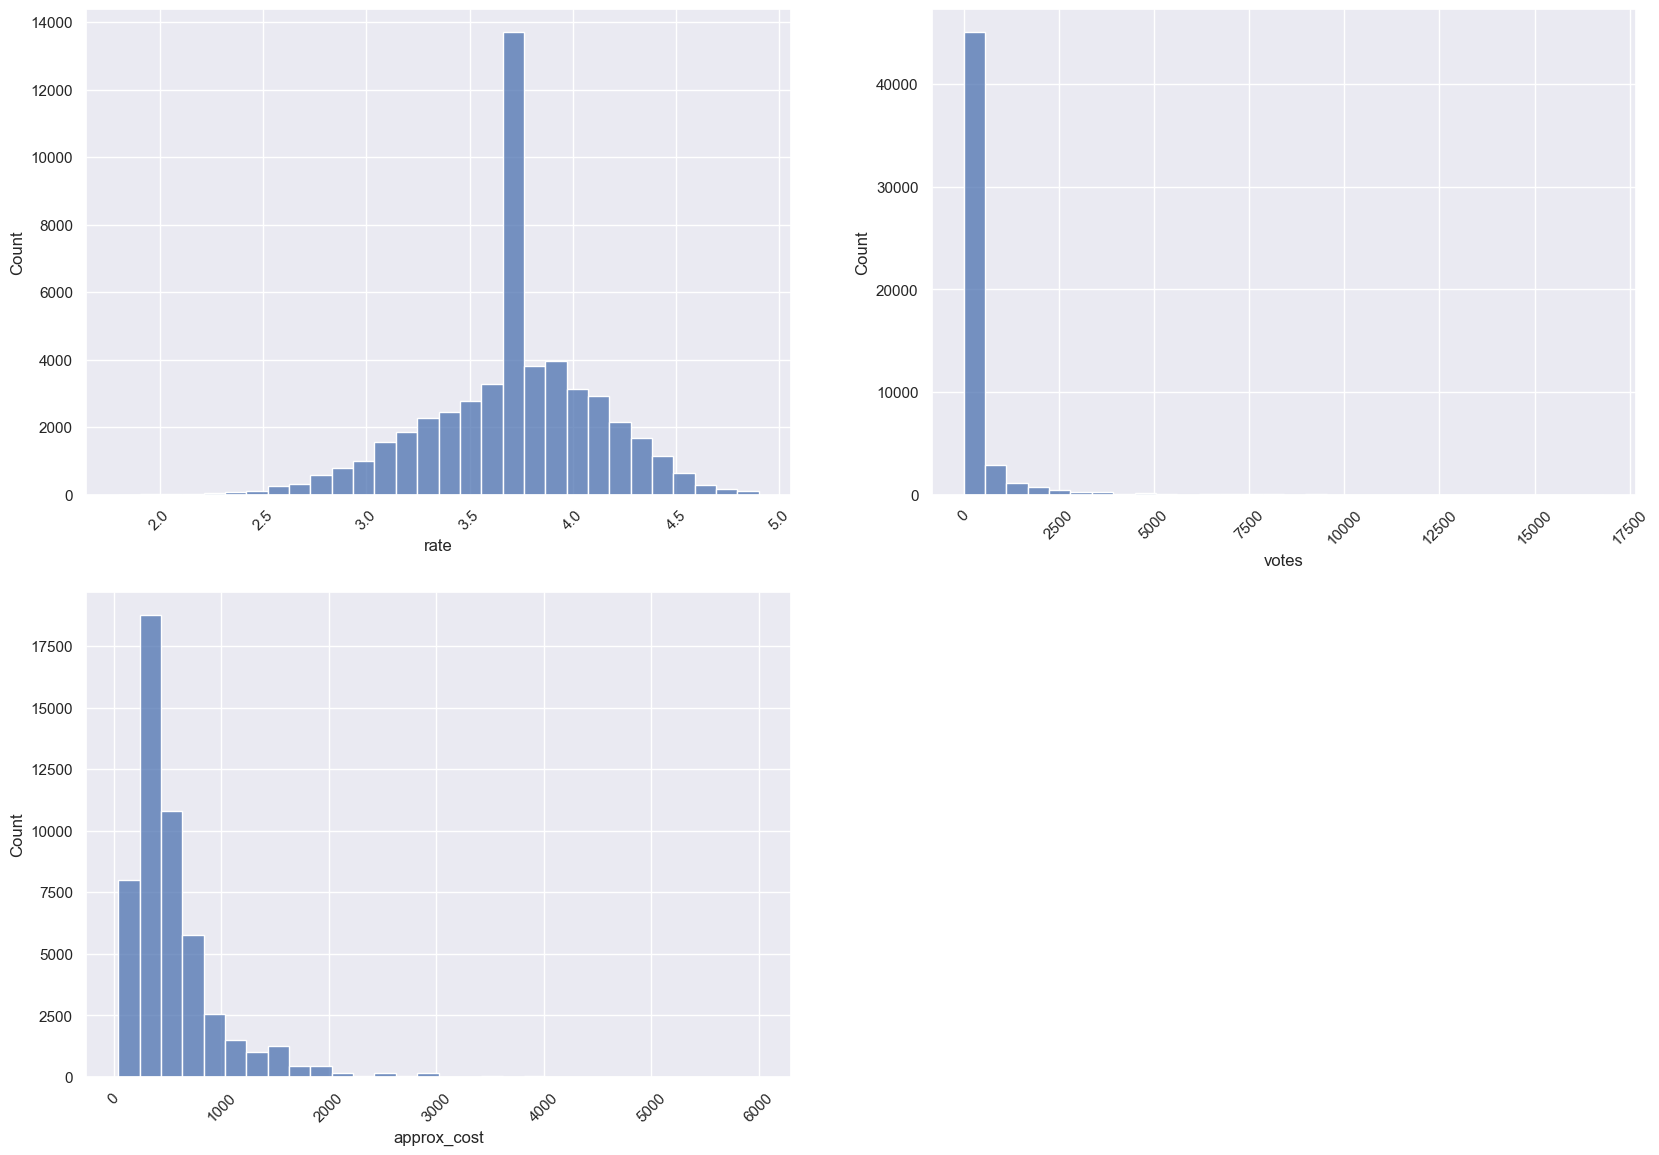

In [33]:
plt.figure(figsize=(20,150))
for i in enumerate(Numerical_features):
    plt.subplot(20,2,i[0]+1)
    sns.set(rc={'figure.figsize':(5,5)})
    sns.histplot(data=df,x=i[1],bins=30)
    plt.xticks(rotation=45)

reset the index

In [34]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

data visualisation

lets check for the most famous restaurants chains in bengaluru

<function matplotlib.pyplot.show(close=None, block=None)>

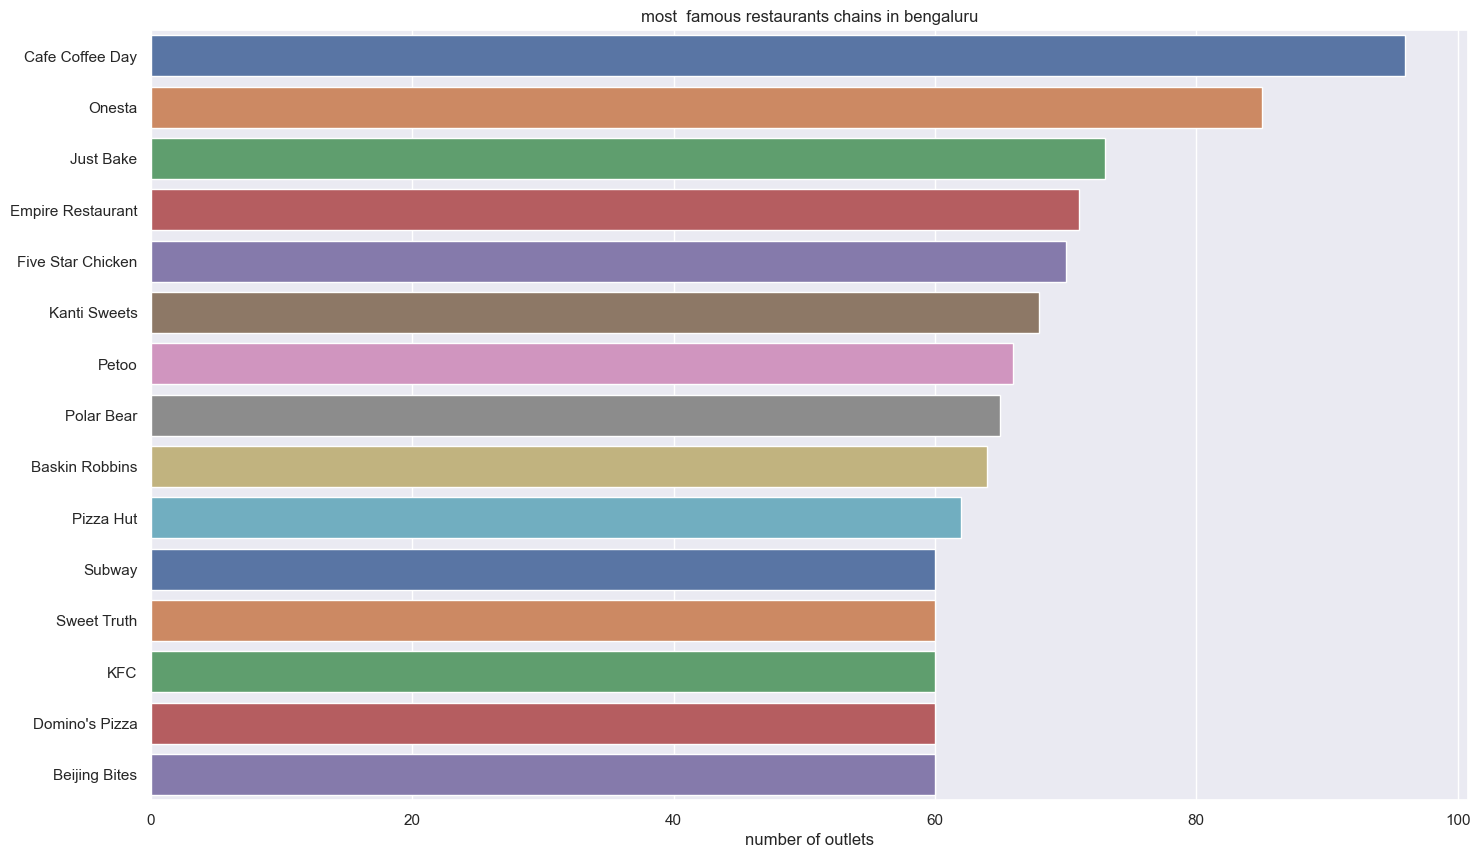

In [35]:
plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:15]
sns.barplot(x=chains,y=chains.index,palette="deep")
plt.title("most  famous restaurants chains in bengaluru")
plt.xlabel("number of outlets")
plt.show

LETS CHECK FOR THE RESTAURANTS WHO HAVE GT THE HIGHEST ORDERS

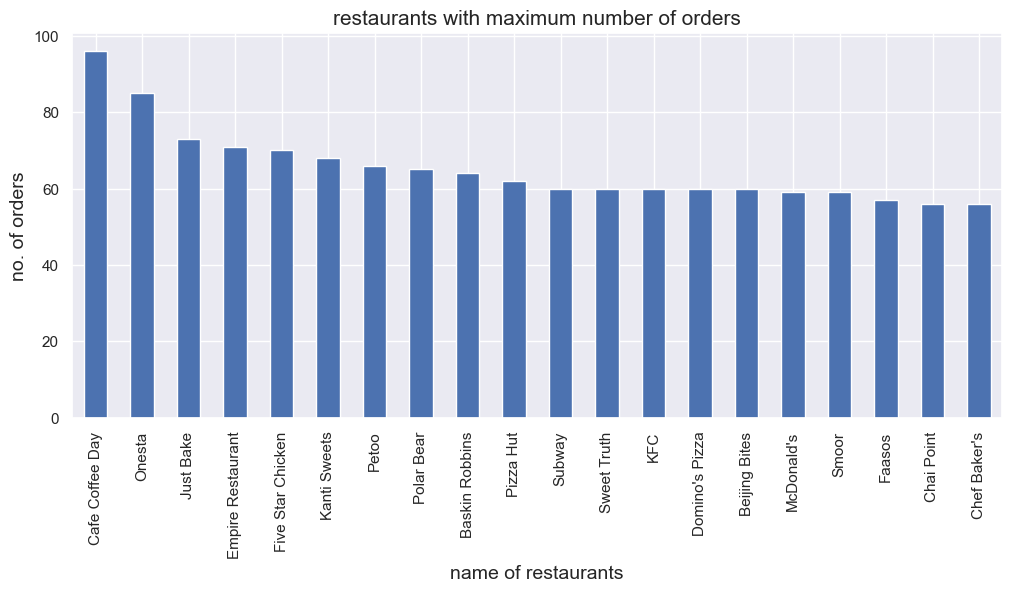

In [36]:
plt.figure(figsize=(12,5))
data=df["name"].value_counts()[:20]
data.plot(kind='bar')
plt.xlabel('name of restaurants',size=14)
plt.ylabel('no. of orders',size=14)
plt.title("restaurants with maximum number of orders",fontsize=15)
plt.show()

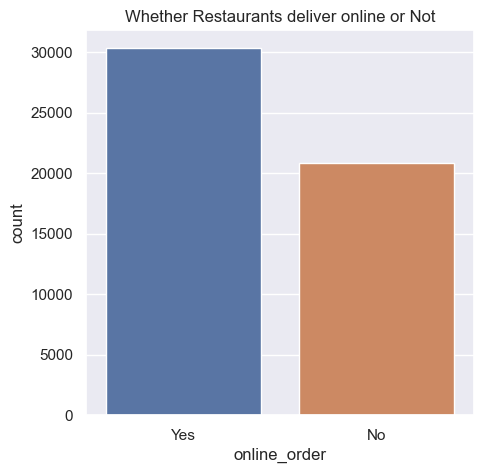

In [37]:
sns.countplot(data=df,x=df['online_order'])
fig=plt.gcf()
fig.set_size_inches(5,5)
plt.title("Whether Restaurants deliver online or Not")
plt.show()

lets check how many restaurants offer pre booking table bookings

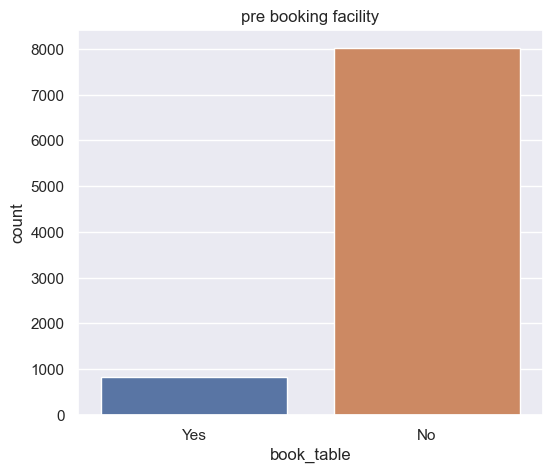

In [38]:
data=df[['name','book_table']].drop_duplicates()
plt.figure(figsize=(6,5))
fx=sns.countplot(x="book_table",data=data).set_title('pre booking facility',fontsize=12)
plt.show()

lets check the locations that have highest orders

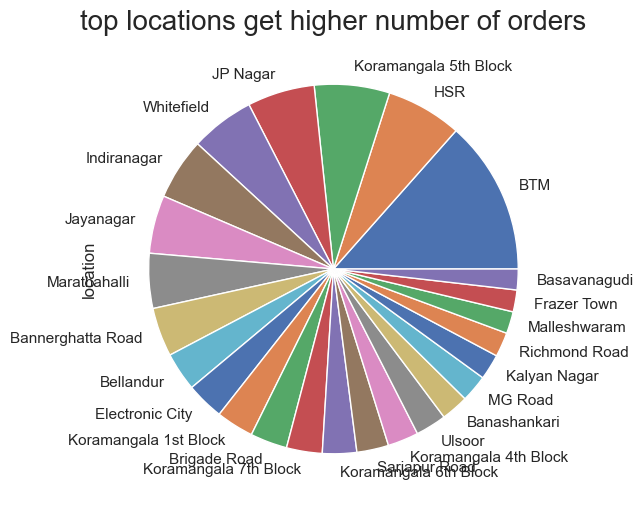

In [39]:
plt.figure(figsize=(12,6))
data=df.location.value_counts()[0:25]
data.plot(kind='pie')
plt.title('top locations get higher number of orders',size=20)
plt.show()

lets check the most common rating for the orders

<Figure size 300x700 with 0 Axes>

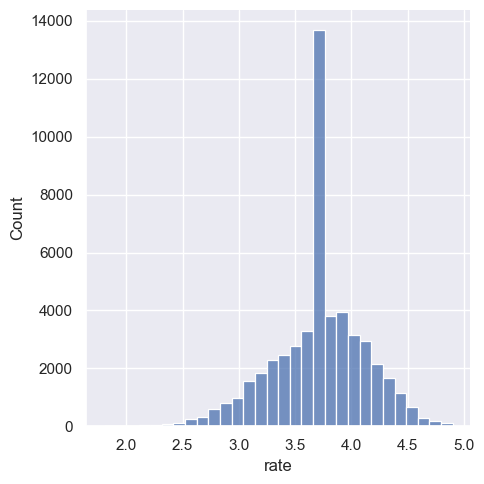

In [40]:
plt.figure(figsize=(3,7))
sns.displot(df['rate'],bins=30) 
#<axesSubplot:xlabel='rate',ylabel='density'>


In [41]:
data=pd.Dataframe(df["approx_cost"].value_counts().reset_index()[:25])
data.columns=[approx_cost,'count']
data=data.set_index('approx_cost')
plt.figure(figsize=(15,7))
sns.barplot(x=data.index,y=data['count'])
plt.xlabel('rate for two people',size=20)
plt.ylabel('no. of orders',size=20)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('top prefferd costs for teo people',size=25)
plt.show()



AttributeError: module 'pandas' has no attribute 'Dataframe'

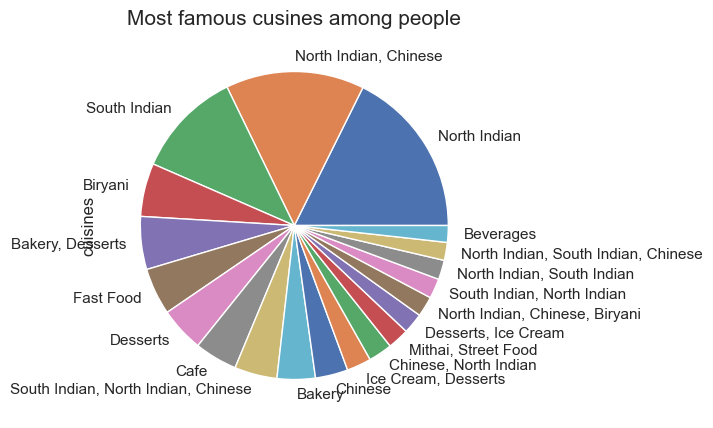

In [42]:
plt.figure(figsize=(12,5))
xyz=df.cuisines.value_counts()[:20].plot(kind='pie')
plt.title("Most famous cusines among people",fontsize=15)
plt.show()

lets check for the top locations with most number of restaurants

In [63]:
loc=pd.DataFrame(df.groupby(by='location')['name'].unique())
loc.columns=['count']
loc.sort_values(by='count',ascending=False,inplace=True)
plt.rcParams['figure.figsize']=(8,6)
ax=loc[0:10].plot(kind='ple',subplots=True)
plt.title('Top locations with most number of restaurants',size=15)
plt.show()

ValueError: operands could not be broadcast together with shapes (147,) (69,) 

(array([0.5, 1.5, 2.5]),
 [Text(0, 0.5, 'rate'), Text(0, 1.5, 'votes'), Text(0, 2.5, 'approx_cost')])

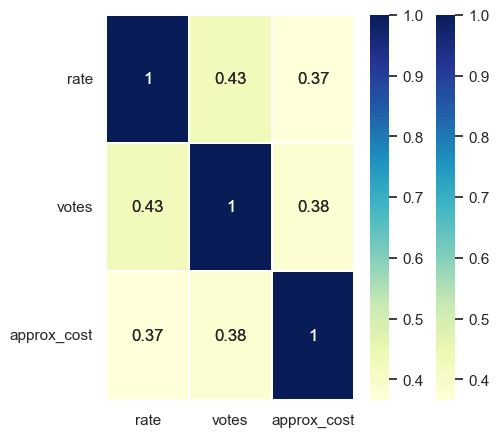

In [44]:
numeric_df = df.select_dtypes(include=['number'])
sns.heatmap(numeric_df.corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)
sns.heatmap(df.select_dtypes(include=['number']).corr(), linewidths=.1, cmap='YlGnBu', annot=True)
plt.yticks(rotation=0)

lets build our models

In [45]:
df.head()


,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


lets convert the categorical variables into a numeric format


for the column "online order"

In [46]:
df.online_order[df.online_order=='yes']=1
df.online_order[df.online_order=='no']=0



In [47]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


In [48]:
df.book_table[df.book_table=='yes']=1

df.book_table[df.book_table=='no']=0

In [49]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari


In [50]:
rest_df = pd.DataFrame(df['rest_type'])
rts = list(rest_df.rest_type.str.split(", "))
unique_rts = list(set([rt for sub_list in rts for rt in sub_list]))
for rt in unique_rts:
    rest_df[rt] = int(0)
rest_df.head()

,rest_type,Bhojanalya,Irani Cafee,Bar,Pop Up,Lounge,Fine Dining,Meat Shop,Food Court,Kiosk,...,Dessert Parlor,Sweet Shop,Quick Bites,Microbrewery,Cafe,Club,Dhaba,Takeaway,Delivery,Casual Dining
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [51]:
count=0
for i in rts:
    rest_df.loc[count,i]=int(1)
    count+=1

In [52]:
rest_df.head()

,rest_type,Bhojanalya,Irani Cafee,Bar,Pop Up,Lounge,Fine Dining,Meat Shop,Food Court,Kiosk,...,Dessert Parlor,Sweet Shop,Quick Bites,Microbrewery,Cafe,Club,Dhaba,Takeaway,Delivery,Casual Dining
0,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,"Cafe, Casual Dining",0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,Quick Bites,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Casual Dining,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [53]:
rest_df.drop(['rest_type'],axis=1,inplace=True)
rest_df.head()

,Bhojanalya,Irani Cafee,Bar,Pop Up,Lounge,Fine Dining,Meat Shop,Food Court,Kiosk,Mess,...,Dessert Parlor,Sweet Shop,Quick Bites,Microbrewery,Cafe,Club,Dhaba,Takeaway,Delivery,Casual Dining
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
cuisines_df = pd.DataFrame(df['cuisines'])
cuisines = list(cuisines_df.cuisines.str.split(", "))
unique_cuisines = list(set([cs for sub_list in cuisines for cs in sub_list]))
unique_cuisines.remove("Cafe") 
unique_cuisines.remove("Bakery")

for cn in unique_cuisines:
    cuisines_df[cn] = 0   
    
cuisines_df.head()

,cuisines,Maharashtrian,Finger Food,Australian,Bar Food,Beverages,Lucknowi,Bubble Tea,Roast Chicken,Rajasthani,...,Hyderabadi,American,Chettinad,Iranian,Goan,Turkish,Modern Indian,Arabian,Sindhi,Afghani
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
correct_cn = []
for i in cuisines:
    if "Cafe" in i:
        i.remove("Cafe") 
    if "Bakery" in i:
        i.remove("Bakery")
    correct_cn.append(list(set(i)))
    count = 0
for i in correct_cn:
    cuisines_df.loc[count, i] = int(1)
    count+=1
cuisines_df.head()

,cuisines,Maharashtrian,Finger Food,Australian,Bar Food,Beverages,Lucknowi,Bubble Tea,Roast Chicken,Rajasthani,...,Hyderabadi,American,Chettinad,Iranian,Goan,Turkish,Modern Indian,Arabian,Sindhi,Afghani
0,"North Indian, Mughlai, Chinese",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Chinese, North Indian, Thai",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Cafe, Mexican, Italian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"South Indian, North Indian",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"North Indian, Rajasthani",0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [56]:
cuisines_df.drop(['cuisines'], axis = 1, inplace=True)
cuisines_df.head()

,Maharashtrian,Finger Food,Australian,Bar Food,Beverages,Lucknowi,Bubble Tea,Roast Chicken,Rajasthani,Afghan,...,Hyderabadi,American,Chettinad,Iranian,Goan,Turkish,Modern Indian,Arabian,Sindhi,Afghani
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


for location 

In [57]:
location_df = df['location']
location_df = pd.get_dummies(location_df)
location_df.head()

,BTM,Banashankari,Banaswadi,Bannerghatta Road,Basavanagudi,Basaveshwara Nagar,Bellandur,Bommanahalli,Brigade Road,Brookefield,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


for the area column

In [58]:
area_df = df['area']
area_df = pd.get_dummies(area_df)
area_df.head()

,BTM,Banashankari,Bannerghatta Road,Basavanagudi,Bellandur,Brigade Road,Brookefield,Church Street,Electronic City,Frazer Town,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
data_with_location = pd.concat([df, rest_df, cuisines_df, location_df], axis=1)
data_with_location.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Ulsoor,Uttarahalli,"Varthur Main Road, Whitefield",Vasanth Nagar,Vijay Nagar,West Bangalore,Whitefield,Wilson Garden,Yelahanka,Yeshwantpur
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0


In [59]:
data_with_area = pd.concat([df, rest_df, cuisines_df, area_df], axis = 1)
data_with_area.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,area,...,Lavelle Road,MG Road,Malleshwaram,Marathahalli,New BEL Road,Old Airport Road,Rajajinagar,Residency Road,Sarjapur Road,Whitefield
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Banashankari,...,0,0,0,0,0,0,0,0,0,0


In [62]:
data_with_location.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis = 1, inplace=True)
data_with_area.drop(columns=['name', 'location', 'rest_type', 'cuisines', 'area'], axis=1, inplace=True)
print(data_with_location.columns[200:])


Index(['RT Nagar', 'Race Course Road', 'Rajajinagar', 'Rajarajeshwari Nagar',
       'Rammurthy Nagar', 'Residency Road', 'Richmond Road', 'Sadashiv Nagar',
       'Sahakara Nagar', 'Sanjay Nagar', 'Sankey Road', 'Sarjapur Road',
       'Seshadripuram', 'Shanti Nagar', 'Shivajinagar', 'South Bangalore',
       'St. Marks Road', 'Thippasandra', 'Ulsoor', 'Uttarahalli',
       'Varthur Main Road, Whitefield', 'Vasanth Nagar', 'Vijay Nagar',
       'West Bangalore', 'Whitefield', 'Wilson Garden', 'Yelahanka',
       'Yeshwantpur'],
      dtype='object')
